In [2]:
!pip install category_encoders

     |████████████████████████████████| 86 kB 2.7 MB/s 


In [3]:
#importing Libraries 
import csv
import category_encoders
import random



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Importing the reader from CSV library
from csv import reader

# Load the csv file
def load_csv(filename):
    # List which will store whole data
    data = list()
    with open(filename,'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            data.append(row)
    return data

# Path of dataset
filename ='/content/encounter.csv'
data1 = load_csv(filename)

# Let's print first 5 datapoints
print(data1[0:1])
print(data1[1:2])

[['Provider_Org', 'Encounter_ID', 'Member_ID', 'Provider_ID', 'Provider_NPI', 'Clinic_ID', 'Encounter_DateTime', 'Encounter_Description', 'CC', 'Episode_ID', 'Patient_DOB', 'Patient_Gender', 'Facility_Name', 'Provider_Name', 'Specialty', 'Clinic_Type', 'lab_orders_count', 'lab_results_count', 'medication_orders_count', 'medication_fulfillment_count', 'vital_sign_count', 'therapy_orders_count', 'therapy_actions_count', 'immunization_count', 'Has_Appt', 'SOAP_Note', 'consult_ordered', 'Disposition']]
[['ExactData Medical Health System', 'L8694502508698944760', '568001602-01', '663746638', '2531462832', 'Sidney Hillman Health Center', '2005-06-30T19:15:00Z', 'Lacy visited primary care physician on 6/30/2005 2:15:00 PM for ChiefComplaint', 'mild occasional lightheadedness', 'L8694502508698944760', '02/24/1972', 'female', '', 'Athena V Morris, MD', 'FAMILY PRACTICE/PRIMARY CARE', 'outpatient_medical', '1', '0', '1', '0', '7', '0', '1', '0', 'True', 's:a 33 year old female crystallographer p

In [6]:

# Path of dataset
filename ='/content/encounter_dx.csv'
data2 = load_csv(filename)

# Let's print first 5 datapoints
print(data2[0:1])

[['Provider_Org', 'code', 'vocab', 'description', 'severity', 'Encounter_ID']]


In [8]:
# Path of dataset
filename ='/content/medication_fulfillment.csv'
data3 = load_csv(filename)

# Let's print first 5 datapoints
print(data3[0:1])

[['Provider_Org', 'Order_ID', 'Member_ID', 'Prescription', 'Pharmacist_ID', 'Pharmacy_Name', 'Dispense_Date', 'Drug_Name', 'Drug_NDC', 'Sig', 'Dispense_Qty', 'Fill_No', 'Fill_Status', 'Dose', 'Units', 'Days_Of_Supply', 'Encounter_ID']]


In [9]:
# Path of dataset
filename ='/content/lab_results.csv'
data4 = load_csv(filename)

# Let's print first 5 datapoints
print(data4[0:1])

[['Provider_Org', 'Member_ID', 'Date_Collected', 'Test_ID', 'Specialty', 'Panel', 'Test_LOINC', 'Test_Name', 'Date_Resulted', 'Specimen', 'Result_LOINC', 'Result_Name', 'Result_Status', 'Result_Description', 'Numeric_Result', 'Units', 'Abnormal_Value', 'Reference_Range', 'Order_ID', 'Provider_ID', 'Encounter_ID']]


In [10]:
print(len(data1),len(data2),len(data3),len(data4))


5448 3064 1177 7510


In [11]:
data1[0:1]

[['Provider_Org',
  'Encounter_ID',
  'Member_ID',
  'Provider_ID',
  'Provider_NPI',
  'Clinic_ID',
  'Encounter_DateTime',
  'Encounter_Description',
  'CC',
  'Episode_ID',
  'Patient_DOB',
  'Patient_Gender',
  'Facility_Name',
  'Provider_Name',
  'Specialty',
  'Clinic_Type',
  'lab_orders_count',
  'lab_results_count',
  'medication_orders_count',
  'medication_fulfillment_count',
  'vital_sign_count',
  'therapy_orders_count',
  'therapy_actions_count',
  'immunization_count',
  'Has_Appt',
  'SOAP_Note',
  'consult_ordered',
  'Disposition']]

In [12]:
data1[1:2]

[['ExactData Medical Health System',
  'L8694502508698944760',
  '568001602-01',
  '663746638',
  '2531462832',
  'Sidney Hillman Health Center',
  '2005-06-30T19:15:00Z',
  'Lacy visited primary care physician on 6/30/2005 2:15:00 PM for ChiefComplaint',
  'mild occasional lightheadedness',
  'L8694502508698944760',
  '02/24/1972',
  'female',
  '',
  'Athena V Morris, MD',
  'FAMILY PRACTICE/PRIMARY CARE',
  'outpatient_medical',
  '1',
  '0',
  '1',
  '0',
  '7',
  '0',
  '1',
  '0',
  'True',
  's:a 33 year old female crystallographer presents with mild spells of vertigo, mild headaches particularly at the back of the head and in the morning x 2 weeks. pt also reports chronic mild occasional lightheadedness. o:Height 160 cm, Weight 53.8 kg, Temperature 37.3 C, Pulse 76, SystolicBP 146, DiastolicBP 93, Respiration 15, Heart = 2/6 systolic murmur at base of heart, Chest = clear to auscultation B/L, no rales or wheezing, Extremities = no edema or clubbing, Heart = normal S1, S2, RRR a

In [13]:
Patient_Gender = {
    'female': 0,
    'male' : 1
}
has_appt ={
    'True' : 1,
    'False' : 0
}
Patient_Gender['female']

0

In [14]:
feature1 = []
for i in range(1, len(data1)):
  # print(data1[i][11])
  if data1[i][11] == 'female':
    feature1.append(int(Patient_Gender['female']))
  else:
    feature1.append(int(Patient_Gender['male']))


In [16]:
feature2 = []
for i in range(1,len(data1)):
  # print(data1[i][24])
  if data1[i][24] == 'True':
    feature2.append(int(has_appt['True']))
  else:
    feature2.append(int(has_appt['False']))



In [17]:
feature3 , feature4 , feature5 , feature6 = [], [] , [] , []
feature7 , feature8 , feature9 , feature10 = [], [] , [] , []
for i in range(1,len(data1)):
  feature3.append(int(data1[i][23]))
  feature4.append(int(data1[i][22]))
  feature5.append(int(data1[i][21]))
  feature6.append(int(data1[i][20]))
  feature7.append(int(data1[i][19]))
  feature8.append(int(data1[i][18]))
  feature9.append(int(data1[i][17]))
  feature10.append(int(data1[i][16]))

In [18]:
feature =[]
for f1,f2,f3,f4,f5,f6,f7,f8,f9 in zip(feature1, feature2, feature3 ,feature4, feature5, feature6, feature7, feature8, feature9):
  feature.append([f1,f2,f3,f4,f5,f6,f7,f8,f9])

In [19]:
feature

[[0, 1, 0, 1, 0, 7, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 1, 1, 0, 7, 0, 0, 2],
 [0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 7, 1, 0, 3],
 [0, 1, 0, 1, 0, 7, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 2],
 [0, 1, 1, 1, 0, 7, 0, 0, 4],
 [0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 7, 0, 0, 3],
 [0, 1, 0, 1, 1, 7, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 7, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 3],
 [0, 1, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 1, 0, 1, 0, 7, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 2],
 [1, 1, 1, 1, 0, 7, 0, 0, 2],
 [1, 0, 0, 0, 0, 0, 0, 0, 3],
 [1, 1, 0, 0, 0, 0, 0, 0, 1],
 [1, 1, 0, 1, 0, 7, 0, 0, 0],
 [1, 1, 0, 1, 0, 7, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 0, 1, 0, 7, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 0, 1, 0, 7, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 2],
 [1, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 1,

In [20]:
!pip install kmodes

In [21]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

In [23]:
# algorithm initialization
iterations = 20
nclusters = 12

nelms = 2000
ncoords = 2 

spreading = 0.3
clumpiness = 4


In [24]:
# Recursive factorial
def factorial(n):
	if n < 0:
		return -1 # Error, defined only for positive numbers
	if n == 1 or n == 0:
		return 1
	return n*factorial(n-1)

In [42]:
# Heron's method
def sqrt(s):
	x = s/2 # initial guess
	# Iterate until error is small
	while x**2 - s > 0.01  or x**2 - s < -0.01:
		x = ((s/x)+x)/2
	return x

In [26]:
# Taylor sin x in degrees
def sin(x):
	x = (x*3.1416)/180 # assuming degrees as input
	s = 0
	for n in range(0,10):
		alpha = 2*n+1
		s = s + (((-1)**n)*(x**alpha))/factorial(alpha)
	return s


In [27]:
# Tylor cos x in degrees
def cos(x):
	x = (x*3.1416)/180
	s = 0
	for n in range(0,10):
		alpha = 2*n
		s = s + (((-1)**n)*(x**alpha))/factorial(alpha)
	return s

In [28]:
# linear congruential method
# x_i+1 = (a*X_n + c) mod m
def myrand(x):
	x = hash(str(x)) # using a hash to have a large starging number
	c = 1013904223
	a = 1664525
	m = 2**32
	x = (a*x+c) % m
	return x/m # to get number between 0 and 1

In [33]:
# Euclidean distance
def distance(v1,v2):
	# If one cluster is empty 
	if len(v1)==0 or len(v2)==0:
		return 1000 # distance is infinite
	sum = 0
	for i in range(len(v1)):
		sum += ((v2[i]-v1[i])**2)
	return sqrt(sum)

######## END Math Functions ##############

############ Algo Functions ##############
	
def centroid(l):
	if len(l)==0:
		return [0,0]
	res = [0,0]
	for i in range(len(res)):
		for a in l:
			res[i]+=elms[a][i]
	for i in range(len(res)):
		res[i]/=len(l)
	return res

def calculateCentroids(l):
	res = []
	for i in l:
		res.append(centroid(i))
	return res

def printClusters(l):
	for n,c in enumerate(l):
		print("cluster: "+str(n))
		for x in c:
			print(elms[x])
		print()
	print()
	

In [34]:
# random points

elms = []
for i in range(nelms):
	v = []
		
	if ncoords > 2: # If more than two coordinates just random
		for n in range(ncoords):
			val = int(cos(n)+i)%clumpiness # Random function
			if myrand(i+myrand(n))>0.5: 
				val = -val
			else:
				val = +val
		
			if myrand(i+myrand(n))>0.5: 
				noise = sin(myrand(i+myrand(n)))*spreading
			else:
				noise = -sin(myrand(i+myrand(n)))*spreading
				
			v.append(val+noise)
	elif ncoords==2: # Two coordinates
		center = []
		for n in range(ncoords):
			val = int(cos(n)+i)%clumpiness # Random function
			if myrand(i+myrand(n))>0.5: 
				val = -val
			else:
				val = +val
			center.append(val)

		for n in range(ncoords):
			for a in range(1,1000): # attempting many times to get a good point
				x = myrand(i+myrand(n)*a) # just creating a random starting point
				y = myrand(n+myrand(i)/a) # depending on the two indices so that
							  # it is different
				# Randomly moving point in the 4 sections of a circle
				x = x if myrand(i+myrand(n))>0.5 else -x
				y = y if myrand(n+myrand(i))>0.5 else -y
				# Check if it is wthin the radius
				if x**2 + y**2 < spreading:
					center[0] = center[0]+x
					center[1] = center[1]+y
					break # as soon as we have a good point beak the loop

		v = center
	elms.append(v)


In [35]:
# Random assignment toclusters
clusters= []
for i in range(nclusters):
	clusters.append([])
for i in range(len(elms)):
	pos = i%nclusters
	clusters[pos].append(i)

print("kmeans")
print("clustering "+str(nelms)+" vectors with "+str(ncoords)+" components in "+str(nclusters)+" clustets")
centroids = calculateCentroids(clusters)
print("centroids")
print(centroids)
#print("elements")
#print(elms)
print()

#algorithm
print("-----")
	
new_assignment = []
for n in range(iterations):
	#print("Iteration: "+str(n))
	#printClusters(clusters)
	#print()


	centroids=calculateCentroids(clusters) # calculate centroids
	for i in range(nclusters):
		clusters[i]=[]
	for e in range(len(elms)): #loop all points
		best = 0
		bestd = 1000
		for c in range(nclusters): #loop over centroids
			d = distance(centroids[c],elms[e])
			if d < bestd:
				best = c
				bestd = d
		if len(clusters[best])==0:
			clusters[best]=[]
		clusters[best].append(e)

printClusters(clusters)
print()

kmeans
clustering 2000 vectors with 2 components in 12 clustets
centroids
[[-0.02561964446394342, -0.04449080756424876], [0.37793483321616306, 0.0739328727073142], [-0.2676566682175962, -0.08581247321514045], [0.01566359408696121, 0.1813898080845592], [0.10409696403372208, 0.01876291841921023], [0.10842149906155993, -0.05070547620671059], [-0.2926069856203066, -0.041953518971365816], [0.04394102760194661, -0.04708061106698197], [-0.03285352545313492, 0.00024456176934875996], [-0.007715783149273281, -0.14267190469636482], [0.02653800095403455, -0.031369999460651575], [0.00542766437304756, -0.19702191877526692]]

-----
cluster: 0
[-1.2187981181778014, -0.5663343707565218]
[-1.7548227752558887, -1.3904123229440302]
[-1.1091339951381087, -0.9374250588007271]
[-1.3902402785606682, -1.3244376350194216]
[-1.6929198058787733, -0.9073898303322494]
[-1.477610372705385, -0.3694167397916317]
[-1.403043914353475, -0.800268036313355]
[-1.6129118001554161, -0.7237585980910808]
[-1.762542886659503, -0

In [39]:
import pandas as pd
from sklearn.cluster import KMeans
k = KMeans(n_clusters=2)
k.fit(pd.DataFrame(feature))
y_pred = k.predict(pd.DataFrame(feature))

In [40]:
import seaborn as sns
df=pd.DataFrame(feature,columns=[i for i in range(len(feature[0]))])
df['label']=y_pred

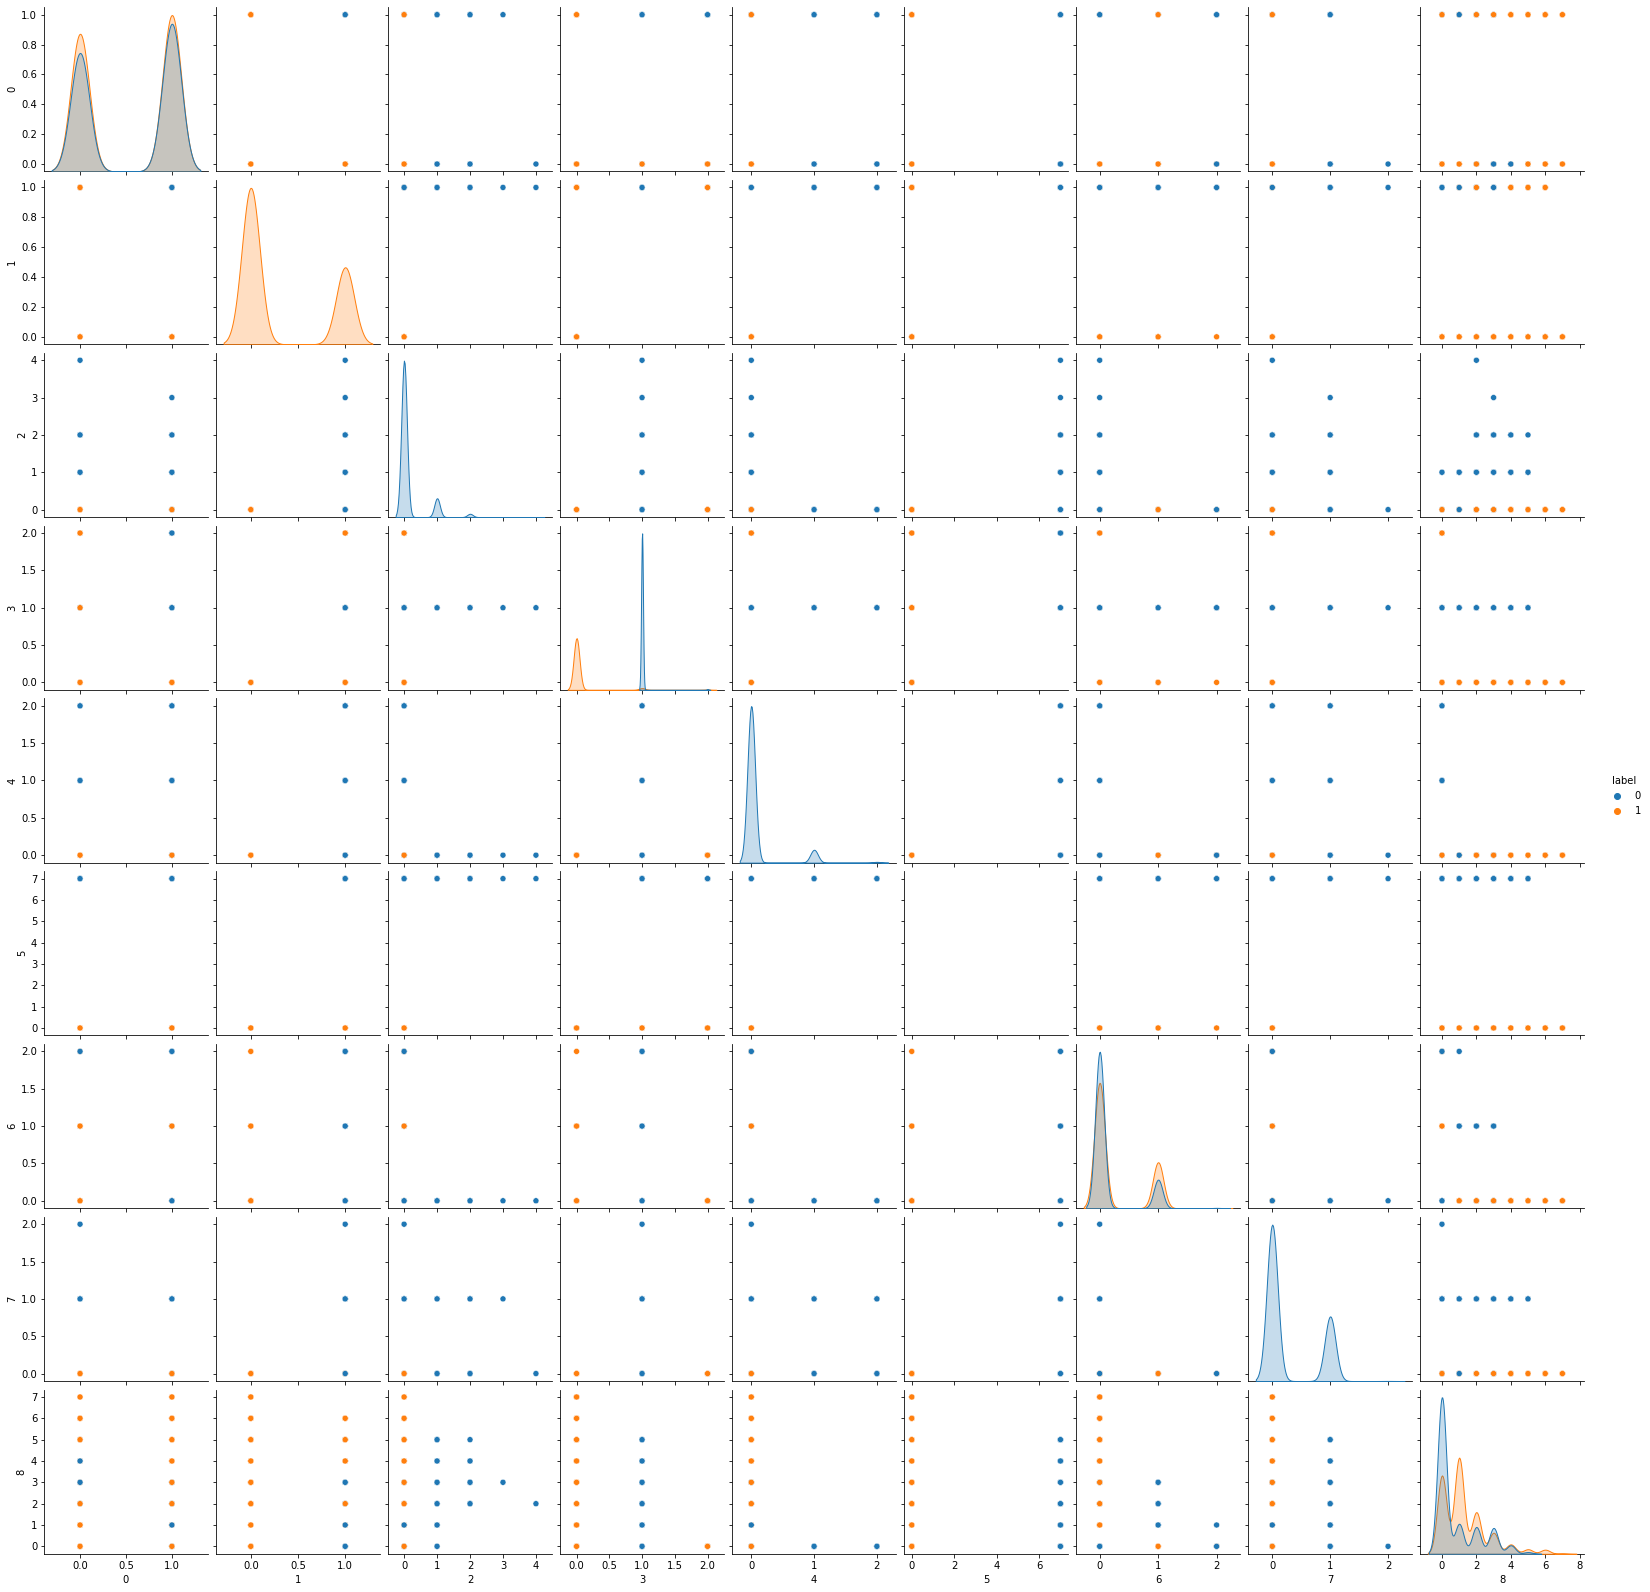

In [41]:
sns.pairplot(df,hue='label')